In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('train_set.csv')
df.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [3]:
for cols in df:
  print(df[cols].value_counts())

2014    86463
2013    83678
2015    79723
2016    37972
Name: Year, dtype: int64
2    91173
4    62854
1    54752
3    26807
5    26127
6    25829
7      294
Name: OGC, dtype: int64
Public Works, Transportation & Commerce     91256
Community Health                            62828
Public Protection                           54769
Human Welfare & Neighborhood Development    26702
Culture & Recreation                        26074
General Administration & Finance            25914
General City Responsibilities                 293
Name: OG, dtype: int64
DPH    62834
MTA    42171
DSS    23839
POL    22896
REC    15972
AIR    13511
FIR    11584
DPW    10977
SHF     7395
ADM     7364
PUC     6749
LIB     6598
WTR     5785
CWP     4112
CRT     3958
HHP     2897
JUV     2363
CAT     2339
DBI     2225
DAT     2141
HRD     2041
ECD     2036
CON     2034
TIS     1990
FAM     1945
PRT     1931
TTX     1893
CPC     1885
REG     1834
ASR     1293
PDR     1218
ADP     1175
ENV      997
BOS      872
MYR

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287836 entries, 0 to 287835
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                287836 non-null  int64  
 1   OGC                 287836 non-null  int64  
 2   OG                  287836 non-null  object 
 3   DC                  287836 non-null  object 
 4   Dept                287836 non-null  object 
 5   UC                  287836 non-null  int64  
 6   Union               287800 non-null  object 
 7   JF                  287798 non-null  object 
 8   Job                 287836 non-null  object 
 9   EI                  287836 non-null  int64  
 10  Salaries            287836 non-null  int64  
 11  Overtime            287836 non-null  int64  
 12  H/D                 287836 non-null  float64
 13  YT                  287836 non-null  object 
 14  Total_Compensation  287836 non-null  int64  
dtypes: float64(1), int64(7), object(7)

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

Year                  0
OGC                   0
OG                    0
DC                    0
Dept                  0
UC                    0
Union                 0
JF                    0
Job                   0
EI                    0
Salaries              0
Overtime              0
H/D                   0
YT                    0
Total_Compensation    0
dtype: int64

In [6]:
df['Union'].unique()

array(['SEIU - Health Workers, Local 1021',
       'Stationary Engineers, Local 39',
       'Prof & Tech Engineers - Miscellaneous, Local 21',
       "Police Officers' Association", 'SEIU - Miscellaneous, Local 1021',
       'SEIU - Human Services, Local 1021',
       'Automotive Machinists, Local 1414',
       'Firefighters - Chiefs/Fire Boat Workers, Local 798',
       'Firefighters - Miscellaneous, Local 798',
       'Transportation Workers, Local 200',
       'Transport Workers - Transit Operators, Local 250-A',
       'Laborers, Local 261',
       'Prof & Tech Engineers - Court Attorneys, Local 21',
       "Deputy Sheriffs' Association",
       'SEIU - Staff and Per Diem Nurses, Local 1021',
       'Transport Workers - Auto Svc Workers, Local 250-A',
       'Municipal Executive Association - Miscellaneous',
       'Teamsters - Supervising Nurses, Local 856',
       'Electrical Workers, Local 6',
       'Prof & Tech Engineers - Personnel, Local 21',
       'Plumbers and Pipefitters

In [7]:
features = ['Job', 'Dept', 'Union', 'Salaries', 'Overtime', 'H/D']
df = df[features + ['Total_Compensation']]


In [8]:
df = df.dropna()
df = df[df['Salaries'] > 0]
df = df[df['Overtime'] > 0]

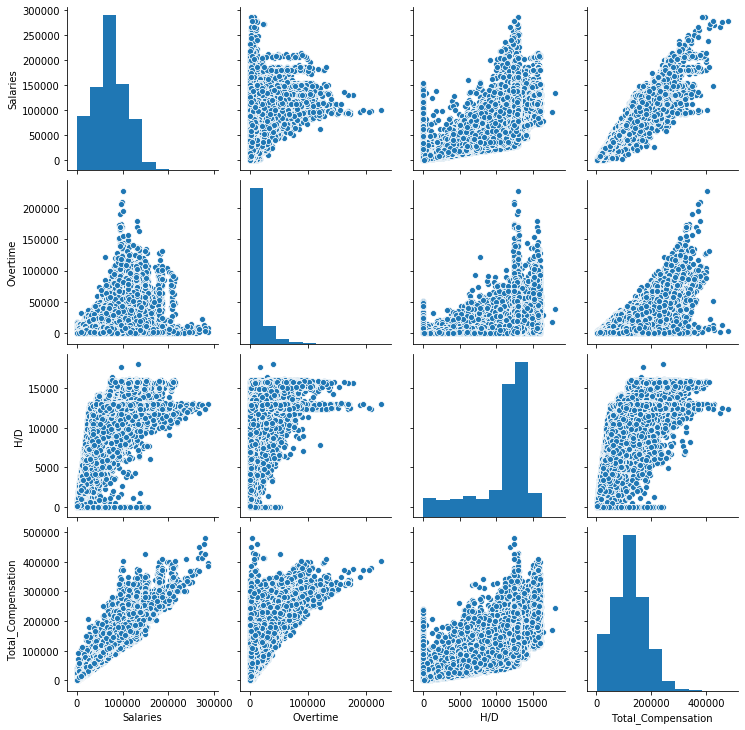

In [9]:
sns.pairplot(df)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score

In [11]:
X = df.drop('Total_Compensation', axis=1)
y = df['Total_Compensation']

In [12]:
categorical_features = ['Job', 'Dept', 'Union']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_categorical = encoder.fit_transform(df[categorical_features])

In [13]:
numeric_features = ['Salaries', 'Overtime', 'H/D']
scaler = StandardScaler()
X_numeric = scaler.fit_transform(df[numeric_features])

In [14]:
X_preprocessed = np.concatenate((X_categorical, X_numeric), axis=1)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = lr.predict(X_val)
r2 = r2_score(y_val, y_pred)
print('R-squared:', r2)

R-squared: -4.638288909868189e+17


In [18]:
X_categorical_full = encoder.transform(df[categorical_features])
X_numeric_full = scaler.transform(df[numeric_features])
X_preprocessed_full = np.concatenate((X_categorical_full, X_numeric_full), axis=1)

In [19]:
compensation_pred = lr.predict(X_preprocessed_full)
df['Total_Compensation_Pred'] = compensation_pred